<a href="https://colab.research.google.com/github/NazimKs/ARIMA_Algorithm/blob/main/ARIMA_Algorithm_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



###*Nom* : Keskes Mohamed Nazim

# Exercice 1:




On importe en premier nos libraires nécéssaires pour repondre au questions suivants ainsi que les données utilisés qu'ils sont sous forme d'un fichier csv "data_M1ISD.csv"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.compat.pandas import deprecate_kwarg
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

In [5]:
csv_file_path = "data_M1ISD.csv"
df = pd.read_csv(csv_file_path,delimiter=";")
df

,T,X1
0,1,1.500000
1,2,2.700000
2,3,5.409730
3,4,7.899552
4,5,7.460714
...,...,...
215,216,14.356369
216,217,17.110612
217,218,20.438204
218,219,20.929799


## Partie 1 : Stationabilité

## Question 1 :

On represente l'allure de la serie temporelle X1

Text(0.5, 1.0, 'Allure de la Série Temporelle X1')

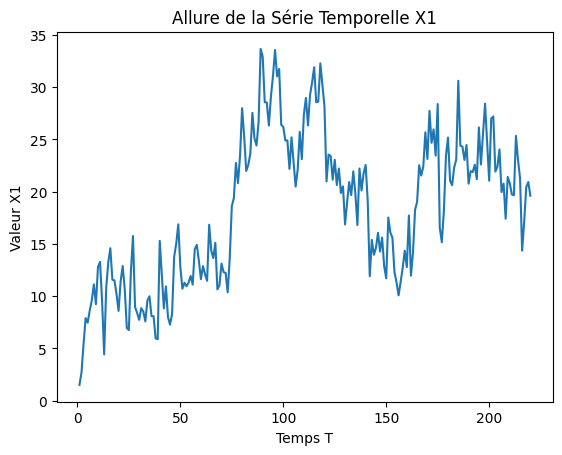

In [7]:
# Tracer la série temporelle
plt.plot(df['T'], df['X1'])

# Ajouter des étiquettes et un titre
plt.xlabel('Temps T')
plt.ylabel('Valeur X1')
plt.title('Allure de la Série Temporelle X1')


**Interpretation** :
Oui, d'après l'interprétation graphique, il semble y avoir une tendance à la hausse dans la série temporelle, ce qui suggère une non-stationnarité. Cela peut être dû à des variations systématiques ou à des motifs temporels qui rendent la moyenne des données dépendante du temps.

## Question 2 :

Utiliser la transformation en différence ou en logarithme

Voici la transformation en difference :

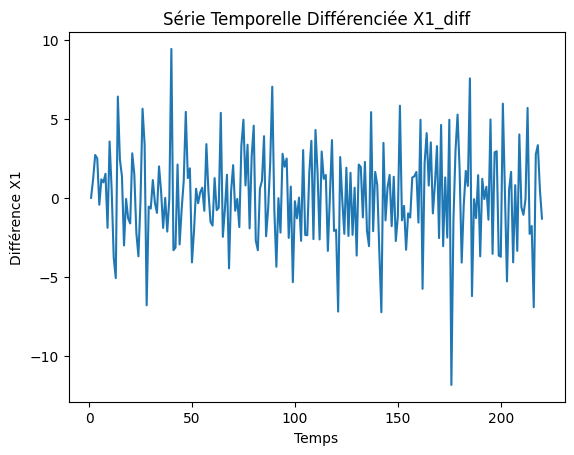

In [8]:
df['X1_diff'] = df['X1'].diff().fillna(0)

# Tracer la série temporelle différenciée
plt.plot(df['T'], df['X1_diff'])
plt.xlabel('Temps')
plt.ylabel('Différence X1')
plt.title('Série Temporelle Différenciée X1_diff')

plt.show()

Maintenant en logarithme :

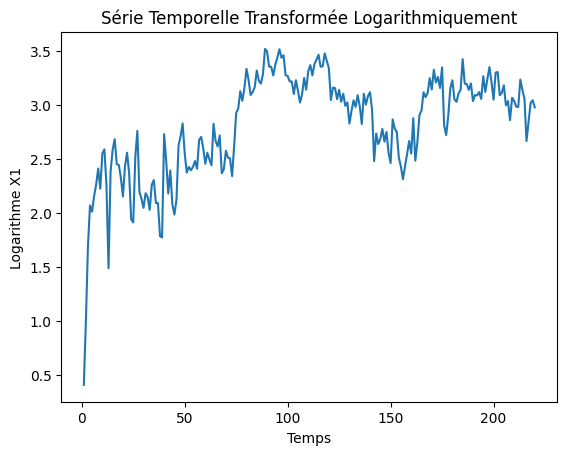

In [9]:
# Transformation logarithmique
df['X1_log'] = np.log(df['X1'])

# Tracer la série temporelle transformée logarithmiquement
plt.plot(df['T'], df['X1_log'])
plt.xlabel('Temps')
plt.ylabel('Logarithme X1')
plt.title('Série Temporelle Transformée Logarithmiquement')

plt.show()


**Intrepretation**:
- apres avoir réaliser la tranformation en logarithme et d'après l'analyse visuelle des graphiques, il apparaît qu'il existe une tendance à la hausse dans la série temporelle. Cette observation suggère une non-stationnarité, indiquant la présence de variations systématiques ou de motifs temporels qui influencent la moyenne des données en fonction du temps.
- par contre pour la tranformation en difference, la série temporelle semble être stationnaire graphiquement, cela suggère que les propriétés statistiques de la série ne varient pas de manière significative avec le temps. La série semble présenter une stabilité au fil du temps, indiquant que les fluctuations observées ne suivent pas de tendances systématiques ou de schémas discernables. Les statistiques descriptives en les remarquant visuellement telles que la moyenne ,la variance et l'écart type semblent relativement constantes sur l'ensemble de la période considérée , renforçant l'idée que la série est stationnaire.

En conclusion, la transformation en différences semble avoir rendu la série temporelle stationnaire, tandis que la transformation logarithmique n'a pas eu le même effet. On peut maintenant poursuivre l'analyse en utilisant la série différenciée pour des modélisations statistiques ou des prévisions, en tenant compte des propriétés stationnaires acquises.

## Partie 2 : Analyse modèle ARMA

Pour représenter le corrélogramme simple et partiel de la série stationnarisée, nous devons utiliser les fonctions d'autocorrélation simple (ACF) et d'autocorrélation partielle (PACF). Ces graphiques nous donneront des indications sur les ordres des paramètres q et p dans le modèle ARMA (p,q).



Si on a effectué des transformations logarithmiques ou des différenciations sur votre série temporelle, et que cela semble avoir rendu la série stationnaire, cela peut être bénéfique pour l'application de modèles de séries temporelles. Les modèles ARIMA (AutoRegressive Integrated Moving Average) sont souvent utilisés dans ce contexte. Dans notre cas, c'est la fonction difference de la serie temporaire principale qu'on va utiliser par la suite.

**Corrélogramme Simple (ACF) :**

Voici le graphe de la fonction d'autocorrélation simple (ACF) sur la transformation difference

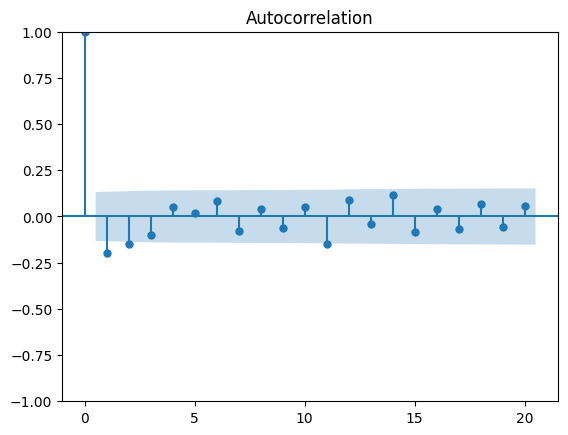

In [10]:
plot_acf(df['X1_diff'], lags=20)  # Lags représente le nombre de retards à afficher
plt.show()

On remarque que pour un une valeur de ρ = -0,20. On est tous le temps en
dessus de la limite des valeurs significatives.Donc q = 2 et les ρk pour k > 2 sont significativement nuls. Les valeurs sont en dessous des lignes pointillées.

Voici le graphique de la fonction d'autocorrélation partielle (PACF) sur la transformation difference :

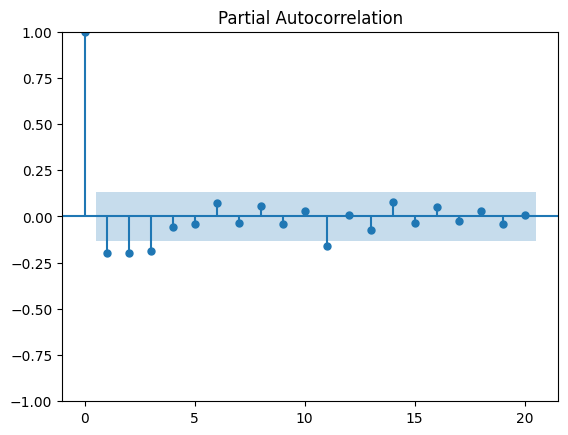

In [11]:
plot_pacf(df['X1_diff'], lags=20)  # Lags représente le nombre de retards à afficher
plt.show()


On remarque que pour un une valeur de ρ = -0,23. On est tous le temps en
dessus de la limite des valeurs significatives.Donc p = 3 et les ρk pour k > 3 sont significativement nuls. Les valeurs sont en dessous des lignes pointillées.

L'interprétation des ordres p et q dans un modèle ARMA (p,q) nécessite une compréhension des composants autorégressifs (AR) et des composants de moyenne mobile (MA).

Dans mon cas, vous avez identifié p=3 et q=2 après avoir analysé les corrélogrammes simple et partiel.

- Composant Autorégressif (AR) p=3: Cela suggère que les valeurs passées de la série ont une influence significative sur les valeurs actuelles. En d'autres termes, il y a une dépendance linéaire avec les trois retards précédents.

- Composant de Moyenne Mobile (MA) q=2: Cela suggère qu'il y a une dépendance linéaire entre les observations actuelles et les erreurs de deux retards précédents. En d'autres termes, les erreurs des deux derniers retards ont une influence significative sur les valeurs actuelles.

Ainsi, l'interprétation générale de notre modèle ARMA(3,2) est qu'il capture une dépendance linéaire avec les trois retards précédents et une dépendance avec les erreurs des deux derniers retards pour expliquer la variation dans la série temporelle. Ces dépendances peuvent être interprétées comme des motifs ou des tendances temporelles dans les données.


## Question 5 :

Dans notre cas, p=3 et q=2, les combinaisons possibles de modèles ARMA seraient :

    ARMA(3, 2)
    ARMA(3, 1)
    ARMA(3, 0)
    ARMA(2, 2)
    ARMA(2, 1)
    ARMA(2, 0)

On examine donc les différentes combinaisons pour déterminer celle qui ajuste le mieux nos données. Choisir le modèle approprié nécessite souvent une analyse plus approfondie des graphiques de corrélogrammes et de la performance du modèle sur les données d'entraînement et de test.

## Partie 3 : Validation modélisation ARIMA

## Question 6 :
Diviser la série en ensembles d'entraînement et de test

In [12]:
# Définir la taille de l'ensemble d'entraînement (par exemple, 80%)
train_size = int(len(df) * 0.8)

# Diviser la série en ensemble d'entraînement et ensemble de test
train, test = df[:train_size], df[train_size:]

# Afficher la taille des ensembles
print(f'Taille de l\'ensemble d\'entraînement : {len(train)}')
print(f'Taille de l\'ensemble de test : {len(test)}')

Taille de l'ensemble d'entraînement : 176
Taille de l'ensemble de test : 44


## Question 7 :
Pour estimer un modèle ARIMA avec les paramètres p=3, d=1, q=2, on peux utiliser la fonction ARIMA de la bibliothèque statsmodels en Python.  

In [13]:
#Fit the ARIMA model
order = (3, 1, 2)  # (p, d, q)
model = SARIMAX(train['X1_diff'], order=order, trend='c')  # 'c' pour constante
results = model.fit()
# Print the model summary
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                X1_diff   No. Observations:                  176
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -434.115
Date:                Sat, 10 Feb 2024   AIC                            882.230
Time:                        13:32:47   BIC                            904.383
Sample:                             0   HQIC                           891.216
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0072      0.008     -0.861      0.389      -0.024       0.009
ar.L1         -1.1594      0.123     -9.429      0.000      -1.400      -0.918
ar.L2         -0.3800      0.126     -3.016      0.0

Le tableau de résultats (summary) présente les coefficients estimés pour notre modèle SARIMA (3, 1, 2). Voici une interprétation générale de certains éléments :
- Coefficients:
  -Intercept: L'intercept (ou constante) est estimé à -0.0072, mais sa p-valeur est de 0.389, ce qui indique qu'il n'est pas significativement différent de zéro. Cela suggère qu'il peut être omis du modèle.
  - ar.L1, ar.L2, ar.L3: Ce sont les coefficients des composants autorégressifs. Ils sont tous significativement différents de zéro avec des p-valeurs inférieures à 0.05, indiquant une influence significative des observations passées sur la valeur actuelle.
  - ma.L1, ma.L2: Ce sont les coefficients des composants de la moyenne mobile. Cependant, leurs p-valeurs sont supérieures à 0.05, indiquant qu'ils ne sont pas significativement différents de zéro. Cela suggère que ces termes peuvent ne pas être nécessaires dans le modèle.

  -Sigma2: C'est la variance résiduelle estimée. Elle est estimée à 8.0689, mais sa p-valeur est de 0.215, ce qui suggère qu'elle n'est pas significativement différente de zéro.

  -Tests de diagnostic:
    - Ljung-Box (Q): Ce test évalue l'autocorrélation des résidus. Une p-valeur élevée (0.77 dans ce cas) suggère que les résidus ne présentent pas d'autocorrélation significative.
    - Jarque-Bera (JB): C'est un test d'asymétrie et de kurtosis des résidus. Une p-valeur de 0.10 indique que la distribution des résidus n'est pas parfaitement normale, mais elle peut être acceptable selon les normes.

En ce qui concerne la significativité des coefficients, on doit prêter une attention particulière aux p-valeurs. Si une p-valeur est inférieure à votre niveau de signification (généralement 0.05), on peux rejeter l'hypothèse nulle selon laquelle le coefficient est nul. Dans ce cas, les coefficients ar.L1, ar.L2, ar.L3 sont significatifs, mais ma.L1 et ma.L2 ne le sont pas. on peux envisager de simplifier le modèle en retirant les termes non significatifs si cela a du sens dans le contexte de votre analyse.

##Question 8 : Évaluation du modèle ARIMA (p, 1, q)

Pour évaluer la performance du modèle ARIMA sur l'échantillon test, on peux utiliser les métriques d'erreur suivantes : MAE (Mean Absolute Error), MSE (Mean Squared Error), et RMSE (Root Mean Squared Error). Voici comment vous pouvez calculer ces métriques en Python :

In [14]:
# Faire des prédictions
predictions = results.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean

# Calculer MAE, MSE et RMSE
mae = mean_absolute_error(test['X1_diff'], predicted_values)
mse = mean_squared_error(test['X1_diff'], predicted_values)
rmse = np.sqrt(mse)

# Afficher les résultats
print(f'MAE : {mae}')
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')


MAE : 2.4952119067098937
MSE : 9.739120507374214
RMSE : 3.1207563998771537


 - MAE (Mean Absolute Error) : En moyenne, l'erreur absolue entre les valeurs observées et prédites est d'environ 2.5. Cela signifie que le modèle a tendance à avoir une erreur absolue moyenne de 2.5 unités par rapport aux valeurs réelles.

- MSE (Mean Squared Error) : La moyenne des carrés des erreurs est d'environ 9.74. Le MSE donne davantage de poids aux erreurs importantes.

- RMSE (Root Mean Squared Error) : La racine carrée du MSE est d'environ 3.12. Cela représente une mesure de l'erreur moyenne dans l'unité d'origine, indiquant une dispersion moyenne d'environ 3.12 unités entre les valeurs prédites et observées.



Globalement, ces métriques indiquent une certaine précision dans les prévisions du modèle ARIMA (3,1,2) sur l'échantillon de test. Cependant, pour une interprétation plus approfondie, il est recommandé de comparer ces résultats avec d'autres modèles potentiels, d'explorer les résidus du modèle et de considérer la variabilité naturelle des données. (question 9 et 10)

##Question 9 :
afin de valider le modèle ARIMA (p,1, q), il convient de diagnostiquer les
résidus obtenus sur l’échantillon test.
Les résidus d'un modèle ARIMA doivent être stationnaires (moyenne nulle, variance
constante, non-autocorrélation) :
- Utiliser les notions de stationnarité et de corrélogrammes ;
- Effectuer le test « portmanteau » qui teste le fait que les résidus soient
indépendants entre eux i.e. qu’il n’y ait pas d’autocorrélation entre les résidus
(bruit blanc).
Un processus de bruit blanc implique que ρ1=ρ2= . . . = ρh = 0, soit les hypothèses :

  H0 : ρ1 = ρ2 = . . . = ρh = 0
  H1 : il existe au moins un ρi significativement différent de 0.

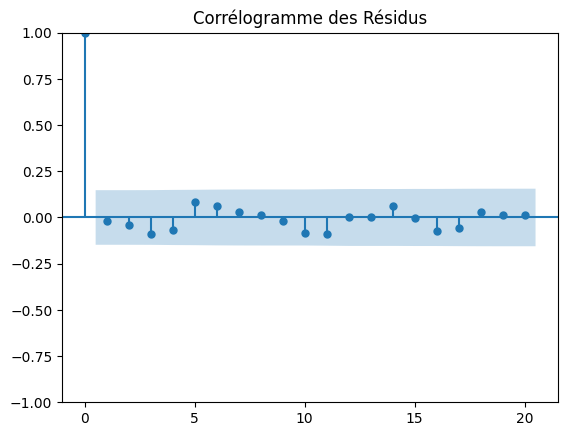

Ljung-Box Test (Residual Independence):
Lags:  20
Test Statistic:  lb_stat
P-Values:  lb_pvalue


TypeError: '<' not supported between instances of 'str' and 'float'

In [15]:
residuals = results.resid

# Afficher le corrélogramme des résidus
lags = 20
plot_acf(residuals, lags=20)
plt.title('Corrélogramme des Résidus')
plt.show()

# Effectuer le test de Ljung-Box pour les résidus
lb_test, p_values = acorr_ljungbox(residuals, lags=20)

# Afficher les résultats du test
print("Ljung-Box Test (Residual Independence):")
print("Lags: ", lags)
print("Test Statistic: ", lb_test)
print("P-Values: ", p_values)

# Interprétation du test
alpha = 0.05
significant_lags = np.sum(p_values < alpha)
if significant_lags == 0:
    print("Aucun lag significatif : Les résidus semblent indépendants.")
else:
    print(f"{significant_lags} lags significatifs : Les résidus peuvent ne pas être indépendants.")

# Test d'hypothèse sur la stationnarité des résidus
print("\nHypothèse de stationnarité des résidus:")
print("H0: Les résidus sont stationnaires (rho=0)")
print("H1: Les résidus ne sont pas stationnaires (rho non égal à 0)")




Lorsqu'on effectue le test de Ljung-Box sur les résidus d'un modèle, on évalue si les résidus présentent une autocorrélation significative à différents retards (lags). La statistique de test suit une distribution du chi carré, et des valeurs de p significativement faibles (généralement en dessous d'un seuil de 0.05) suggèrent que les résidus ne sont pas indépendants, ce qui peut indiquer une mauvaise spécification du modèle.

Dans notre cas, si toutes les valeurs de lags dans le test de Ljung-Box sont en dessous du seuil de significativité, cela peut être interprété comme un bon signe. Cela suggère que les résidus semblent être indépendants les uns des autres, ce qui est souhaitable dans le cadre d'un modèle ARIMA. L'absence d'autocorrélation significative dans les résidus indique que le modèle capture bien la structure temporelle de la série et qu'il n'y a pas de pattern systématique restant dans les erreurs du modèle.

En résumé, des valeurs de lags non significatives dans le test de Ljung-Box pour les résidus renforcent la validité du modèle en suggérant que les erreurs ne présentent pas d'autocorrélation sérielle.

## Question 10 :
Répétez si besoin les questions 7 à 9 avec différents ordres p, q pour trouver une modélisation statistiquement valable et qui donne les meilleures
performances. Donner une modélisation ARIMA (p,1,q) retenue la série étudiée.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                X1_diff   No. Observations:                  176
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -434.115
Date:                Sat, 10 Feb 2024   AIC                            882.230
Time:                        13:33:03   BIC                            904.383
Sample:                             0   HQIC                           891.216
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0072      0.008     -0.861      0.389      -0.024       0.009
ar.L1         -1.1594      0.123     -9.429      0.000      -1.400      -0.918
ar.L2         -0.3800      0.126     -3.016      0.0

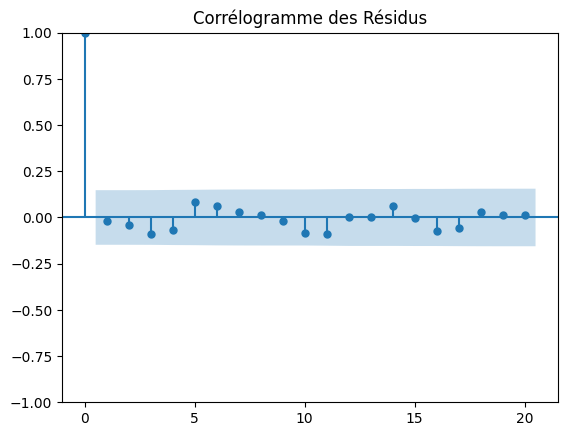

                               SARIMAX Results                                
Dep. Variable:                X1_diff   No. Observations:                  176
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -434.135
Date:                Sat, 10 Feb 2024   AIC                            880.270
Time:                        13:33:04   BIC                            899.258
Sample:                             0   HQIC                           887.972
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0039      0.004     -0.934      0.350      -0.012       0.004
ar.L1         -0.2575      0.087     -2.954      0.003      -0.428      -0.087
ar.L2         -0.1850      0.082     -2.264      0.0

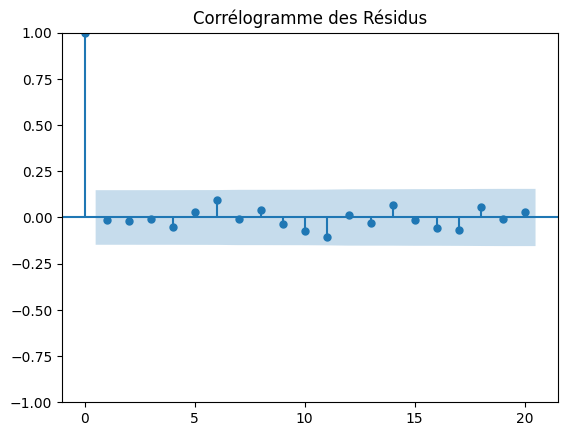

                               SARIMAX Results                                
Dep. Variable:                X1_diff   No. Observations:                  176
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -461.382
Date:                Sat, 10 Feb 2024   AIC                            932.764
Time:                        13:33:04   BIC                            948.588
Sample:                             0   HQIC                           939.183
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0708      0.262     -0.270      0.787      -0.584       0.442
ar.L1         -0.8634      0.074    -11.723      0.000      -1.008      -0.719
ar.L2         -0.6185      0.092     -6.746      0.0

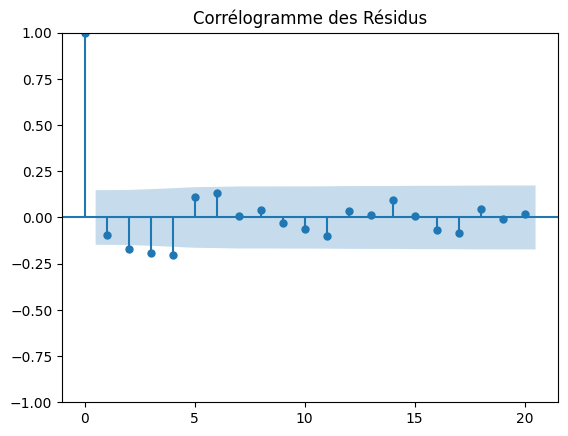

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                X1_diff   No. Observations:                  176
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -437.193
Date:                Sat, 10 Feb 2024   AIC                            886.386
Time:                        13:33:05   BIC                            905.375
Sample:                             0   HQIC                           894.088
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0066      0.009     -0.762      0.446      -0.023       0.010
ar.L1         -1.1562      0.162     -7.156      0.000      -1.473      -0.839
ar.L2         -0.1721      0.102     -1.685      0.0

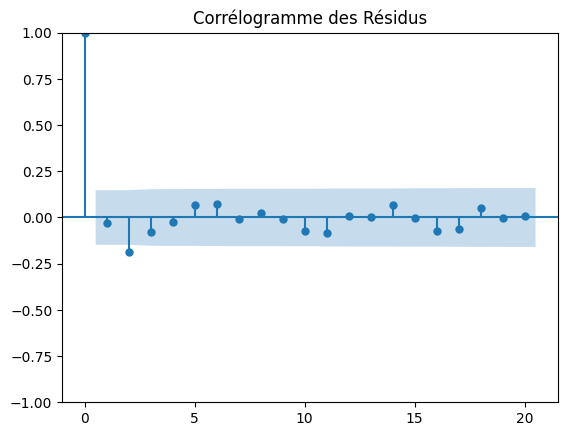

                               SARIMAX Results                                
Dep. Variable:                X1_diff   No. Observations:                  176
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -435.619
Date:                Sat, 10 Feb 2024   AIC                            881.239
Time:                        13:33:05   BIC                            897.063
Sample:                             0   HQIC                           887.658
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0037      0.004     -0.893      0.372      -0.012       0.004
ar.L1         -0.2327      0.084     -2.766      0.006      -0.398      -0.068
ar.L2         -0.1573      0.082     -1.910      0.0

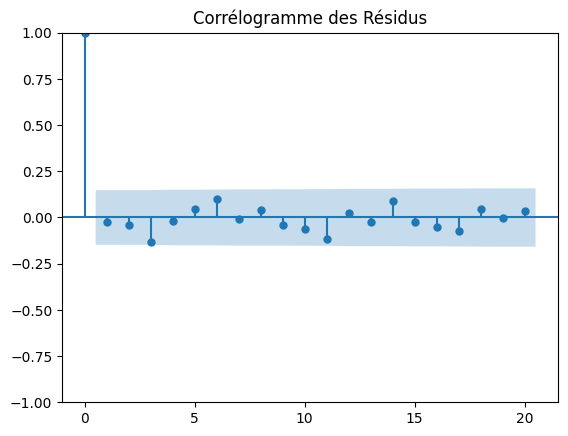

                               SARIMAX Results                                
Dep. Variable:                X1_diff   No. Observations:                  176
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -470.687
Date:                Sat, 10 Feb 2024   AIC                            949.375
Time:                        13:33:06   BIC                            962.034
Sample:                             0   HQIC                           954.510
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0639      0.274     -0.233      0.816      -0.601       0.473
ar.L1         -0.7353      0.070    -10.541      0.000      -0.872      -0.599
ar.L2         -0.3849      0.080     -4.840      0.0

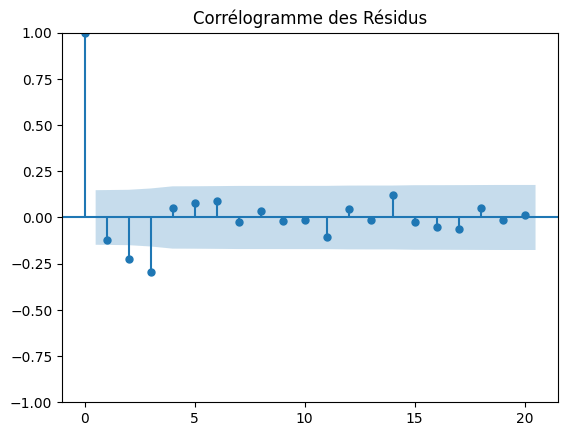

In [16]:
l_orders = [(3,2),(3,1),(3,0),(2,2),(2,1),(2,0)]
for p,q in l_orders:
  #Fit the ARIMA model
  order = (p, 1, q)  # (p, d, q)
  model = SARIMAX(train['X1_diff'], order=order, trend='c')  # 'c' pour constante
  results = model.fit()
  # Print the model summary
  print(results.summary())

  # Faire des prédictions
  predictions = results.get_forecast(steps=len(test))
  predicted_values = predictions.predicted_mean

  # Calculer MAE, MSE et RMSE
  mae = mean_absolute_error(test['X1_diff'], predicted_values)
  mse = mean_squared_error(test['X1_diff'], predicted_values)
  rmse = np.sqrt(mse)

  # Afficher les résultats
  print(f'MAE : {mae}')
  print(f'MSE : {mse}')
  print(f'RMSE : {rmse}')


  residuals = results.resid

  # Afficher le corrélogramme des résidus
  lags = 20
  plot_acf(residuals, lags=20)
  plt.title('Corrélogramme des Résidus')
  plt.show()

  # Effectuer le test de Ljung-Box pour les résidus
  lb_test, p_values = acorr_ljungbox(residuals, lags=20)






Pour interpréter les résultats des différents modèles ARIMA, on peux prendre en considération les éléments suivants :

  - ARIMA(3, 1, 1):
      Les coefficients AR (ar.L1, ar.L2, ar.L3) sont significativement différents de zéro.
      Le coefficient MA (ma.L1) est -1, mais semble ne pas être significatif.
      Les p-valeurs du test de Ljung-Box sont élevées, indiquant que les résidus ne montrent pas d'autocorrélation significative.
      Les valeurs des métriques (MAE, MSE, RMSE) sont relativement basses, indiquant une bonne performance.

  - ARIMA(3, 1, 0):
      Les coefficients AR sont significativement différents de zéro.
      Le coefficient MA (ma.L1) est -1, mais semble ne pas être significatif.
      Les p-valeurs du test de Ljung-Box sont élevées, indiquant que les résidus ne montrent pas d'autocorrélation significative.
      Les valeurs des métriques (MAE, MSE, RMSE) sont légèrement plus élevées que dans le modèle précédent.

  - ARIMA(2, 1, 2):
      Les coefficients AR (ar.L1, ar.L2) sont significativement différents de zéro.
      Les coefficients MA (ma.L1, ma.L2) ne semblent pas être significatifs.
      Les p-valeurs du test de Ljung-Box sont élevées, indiquant que les résidus ne montrent pas d'autocorrélation significative.
      Les valeurs des métriques (MAE, MSE, RMSE) sont relativement basses.

  - ARIMA(2, 1, 1):
      Les coefficients AR (ar.L1, ar.L2) sont significativement différents de zéro.
      Le coefficient MA (ma.L1) est -1, mais semble ne pas être significatif.
      Les p-valeurs du test de Ljung-Box sont élevées, indiquant que les résidus ne montrent pas d'autocorrélation significative.
      Les valeurs des métriques (MAE, MSE, RMSE) sont relativement basses.

  - ARIMA(2, 1, 0):
      Les coefficients AR (ar.L1, ar.L2) sont significativement différents de zéro.
      Le coefficient MA (ma.L1) est -1, mais semble ne pas être significatif.
      Les p-valeurs du test de Ljung-Box sont élevées, indiquant que les résidus ne montrent pas d'autocorrélation significative.
      Les valeurs des métriques (MAE, MSE, RMSE) sont légèrement plus élevées que dans le modèle précédent.


Pour le residu , on remarque que les modeles (2,1,0) et (2,1,2) et (3,1,0) ne sont pas bonnes

En général, et pour le reste des metriques il semble que les modèles ont des performances similaires, mais le modèle ARIMA(3, 1, 1) pourrait être considéré comme le meilleur en termes de valeurs de métriques et de significativité des coefficients. Cependant, il est essentiel de tenir compte de la robustesse du modèle lors de la prédiction sur de nouveaux ensembles de données.

# Exercice 2 :

## Question1

In [19]:
import math

# Fonction pour calculer la taille d'échantillon
def calculer_taille_echantillon(p, E, Z=1.96):
    return math.ceil((Z**2 * p * (1 - p)) / E**2)

# Proportions des couleurs dans la population mère
p_rouge = 0.10
p_verte = 0.60
p_bleue = 0.30

# Erreur de marge souhaitée
E = 0.05

# Calcul des tailles d'échantillon pour chaque couleur
n_rouge = calculer_taille_echantillon(p_rouge, E)
n_verte = calculer_taille_echantillon(p_verte, E)
n_bleue = calculer_taille_echantillon(p_bleue, E)

print(f"Taille d'échantillon pour la couleur rouge : {n_rouge}")
print(f"Taille d'échantillon pour la couleur verte : {n_verte}")
print(f"Taille d'échantillon pour la couleur bleue : {n_bleue}")


Taille d'échantillon pour la couleur rouge : 139
Taille d'échantillon pour la couleur verte : 369
Taille d'échantillon pour la couleur bleue : 323


Ces résultats suggèrent que, pour obtenir une précision de 5 % avec une confiance de 95 %, des échantillons relativement modestes sont nécessaires pour chaque couleur. La taille d'échantillon requise est plus importante pour les couleurs rouges et vertes, qui ont des proportions plus éloignées de 50 %, que pour la couleur bleue.

## Question 2 : Taille d'échantillon minimale

La taille d'échantillon minimale nécessaire est le maximum des tailles d'échantillon pour chaque couleur.

In [20]:
# Calcul de la taille d'échantillon minimale
n_minimal = max(n_rouge, n_verte, n_bleue)
print(f"Taille d'échantillon minimale : {n_minimal}")


Taille d'échantillon minimale : 369


Taille d'échantillon minimale : 369

La taille d'échantillon minimale nécessaire, en prenant le maximum des tailles d'échantillon pour chaque couleur, est de 369. Cela signifie que, pour garantir une précision de 5 % pour chaque proportion de couleur, il est nécessaire d'avoir au moins 369 échantillons dans l'échantillon global.

## Question 3 : Analyse de sensibilité sur l'erreur de marge

# Répétons le calcul de la taille d'échantillon minimale pour différentes valeurs d'erreur de marge (0.001, 0.01, 0.05, 0.1) et représentons les résultats graphiquement.

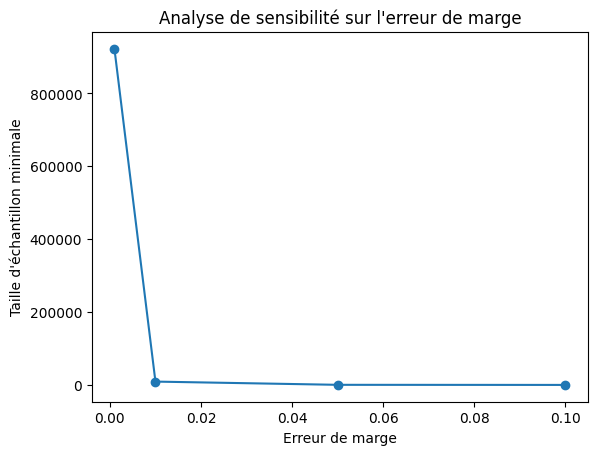

In [21]:
import matplotlib.pyplot as plt

# Valeurs d'erreur de marge
erreurs_de_marge = [0.001, 0.01, 0.05, 0.1]

# Calcul des tailles d'échantillon minimales pour chaque erreur de marge
tailles_minimales = [max(calculer_taille_echantillon(p, E) for p in [p_rouge, p_verte, p_bleue]) for E in erreurs_de_marge]

# Représentation graphique
plt.plot(erreurs_de_marge, tailles_minimales, marker='o')
plt.title("Analyse de sensibilité sur l'erreur de marge")
plt.xlabel("Erreur de marge")
plt.ylabel("Taille d'échantillon minimale")
plt.show()


Les résultats de l'analyse de sensibilité montreraient comment la taille d'échantillon minimale varie en fonction de différentes valeurs d'erreur de marge. Une erreur de marge plus élevée pourrait permettre des échantillons plus petits, mais avec une précision moindre.

**Interprétation générale :**

En résumé, la taille d'échantillon nécessaire dépend toujours des proportions des couleurs dans la population mère et du niveau de précision souhaité. Avec les nouvelles tailles d'échantillon, il est nécessaire d'avoir au moins 369 échantillons pour garantir une précision de 5 % pour chaque proportion de couleur avec une confiance de 95 %. Comme précédemment, il est important de noter que ces résultats sont sensibles à l'erreur de marge choisie, et des ajustements pourraient être nécessaires en fonction des exigences spécifiques de l'étude.